In [2]:
#!/bin/env python

from __future__ import absolute_import, division, print_function, unicode_literals

import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"


# import matplotlib.style
# import matplotlib as mpl
# mpl.use('Agg')
# # mpl.style.use('seaborn')
# mpl.rc('image', cmap='gray')

import matplotlib.pyplot as plt
	
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,10)


import time, re, sys, os
from tqdm import tqdm, trange

import pandas as pd
import xarray as xr
from glob import glob
import numpy as np
from scipy import stats
# Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install --user Pillow

from PIL import Image
from random import seed
from random import randint




### Working results from new dataset that contains only 3 years dataset from 1996 1997 and 1998




In [18]:




from random import seed
from random import randint

climate_counter = 94375

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path +   "new_dataset_logan_annealed_omega_128_{}_mmustafa.npy".format(climate_counter))    
    
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)



normalized_omega_data = np.load ( "/project/projectdirs/dasrepo/mustafa/data/climate/sims/normalized/normalized_seven_channels_1998.npy")
np.random.shuffle(normalized_omega_data)
print(normalized_omega_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data = []
for i in range (normalized_omega_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_omega_data.append(normalized_omega_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_omega_data[0].shape)
cropped_normalized_omega_data  = cropped_normalized_omega_data[0]
print(type(cropped_normalized_omega_data))


(750, 128, 128, 1)
(2920, 7, 512, 512)
(2920, 1, 128, 128)
<class 'numpy.ndarray'>


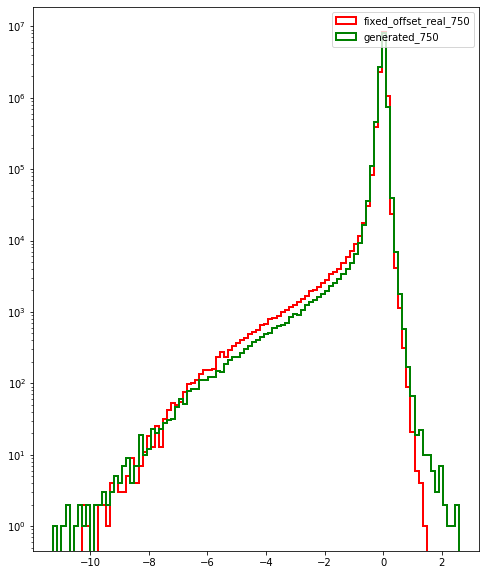

In [3]:

plt.hist([omega_generated_data[-750:].flatten(), cropped_normalized_omega_data[-750:].flatten()  ], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["generated_750",  "fixed_offset_real_750"])
plt.yscale("log")
plt.legend(loc='best')

750it [00:18, 40.28it/s] 
750it [00:25, 29.20it/s] 


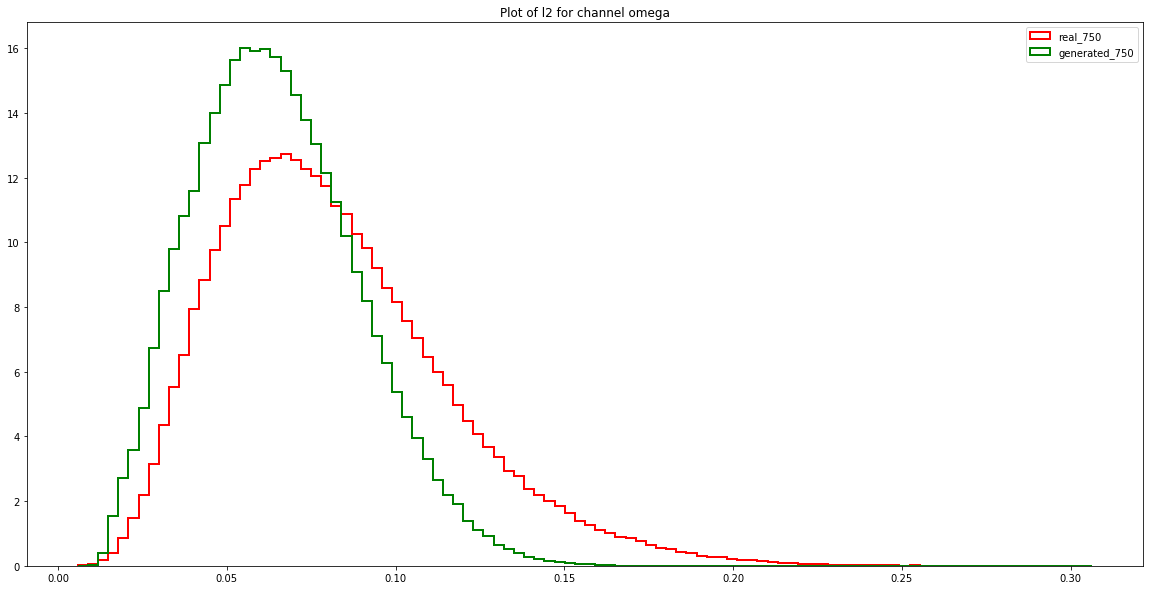

In [8]:
# Now l2 image plots





generated_image = omega_generated_data
real_image = cropped_normalized_omega_data[:750]

channels = 1
number_l2 = 750

fig, axs = plt.subplots(nrows=channels, figsize=(20, channels*10))
# for i, y_ax in enumerate(ys):
#     pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = ["omega"]
channels =1

for chan in range(channels):
    
#     generated_image =  generated_three_channel_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



    l2_real = []
    for i, img in tqdm(enumerate(real_image)):
        foo = [calculateDistance(img,j) for j in real_image[i+1:]]
        l2_real.append(foo)
    real_distances = [j for i in l2_real for j in i]

    axs.hist([  fake_distances, real_distances ], color=[ 'g', 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "generated_{}".format(number_l2), "real_{}".format(number_l2)  ], density=True)
    axs.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    axs.legend(loc='best')

In [4]:



# normalized_omega_data_98 = np.load ( "/project/projectdirs/dasrepo/mustafa/data/climate/sims/normalized/normalized_seven_channels_1998.npy", mmap_mode='r')
# np.random.shuffle(normalized_omega_data_98)




normalized_omega_data_99 = np.load ( "/project/projectdirs/dasrepo/mustafa/data/climate/sims/normalized/normalized_seven_channels_1999.npy")
np.random.shuffle(normalized_omega_data_99)


normalized_omega_data_00 = np.load ( "/project/projectdirs/dasrepo/mustafa/data/climate/sims/normalized/normalized_seven_channels_2000.npy")
np.random.shuffle(normalized_omega_data_00)


climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data_98 = []
cropped_normalized_omega_data_99 = []
cropped_normalized_omega_data_00 = []


for i in range (normalized_omega_data_99.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
#     cropped_normalized_omega_data_98.append(normalized_omega_data_98[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])
    cropped_normalized_omega_data_99.append(normalized_omega_data_99[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])
    cropped_normalized_omega_data_00.append(normalized_omega_data_00[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


# print(cropped_normalized_omega_data[0].shape)
# cropped_normalized_omega_data_98  = cropped_normalized_omega_data_98[0]
cropped_normalized_omega_data_99  = cropped_normalized_omega_data_99[0]
cropped_normalized_omega_data_00  = cropped_normalized_omega_data_00[0]




# print(type(cropped_normalized_omega_data))

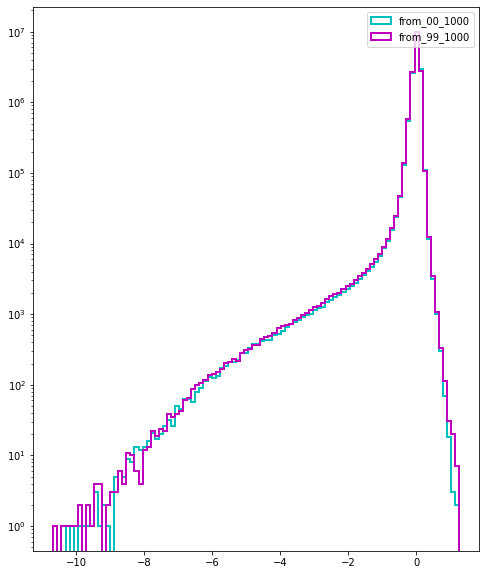

In [5]:



plt.hist([ cropped_normalized_omega_data_99[:1000].flatten(), cropped_normalized_omega_data_00[:1000].flatten()  ], color=[ 'm', 'c'], bins=100, linewidth=2 ,histtype='step', label=[ "from_99_1000", "from_00_1000" ])


plt.yscale("log")
plt.legend(loc='best')

In [9]:
del(cropped_normalized_omega_data_99)
del(cropped_normalized_omega_data_00)
del(normalized_omega_data_99)
del(normalized_omega_data_00)

import gc
gc.collect()

4664

In [15]:
print(cropped_normalized_omega_data_00.shape)

(2920, 1, 128, 128)


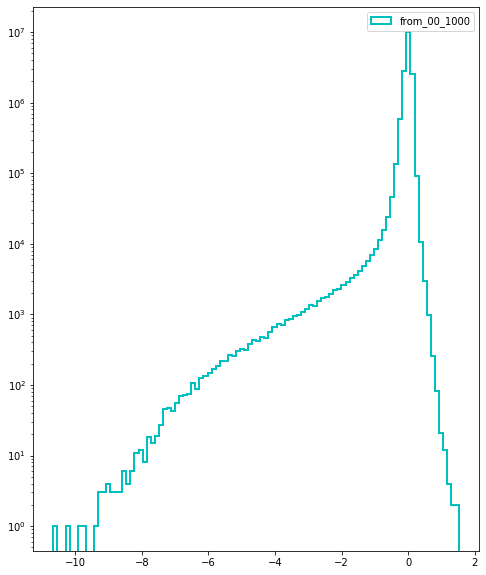

In [16]:

plt.hist([ cropped_normalized_omega_data_00[:1000].flatten()  ], color=[  'c'], bins=100, linewidth=2 ,histtype='step', label=[ "from_00_1000" ])


plt.yscale("log")
plt.legend(loc='best')




# Now Results for normalized Ux case

In [10]:








counter = 60000


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)



files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
np.save(save_path + "new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_at_counter_{}.npy".format(counter), final_array)






climate_counter = 60000

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path +   "new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_at_counter_{}.npy".format(climate_counter))    
    
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)



normalized_omega_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/climate_data_original_normalized_ux_channel/1998.npy")
np.random.shuffle(normalized_omega_data)
print(normalized_omega_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data = []
for i in range (normalized_omega_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_omega_data.append(normalized_omega_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_omega_data[0].shape)
cropped_normalized_omega_data  = cropped_normalized_omega_data[0]
print(type(cropped_normalized_omega_data))


Number of files : 6
total_number_of_files: 6 and shape of each file (50, 128, 128, 1)
(300, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)
<class 'numpy.ndarray'>


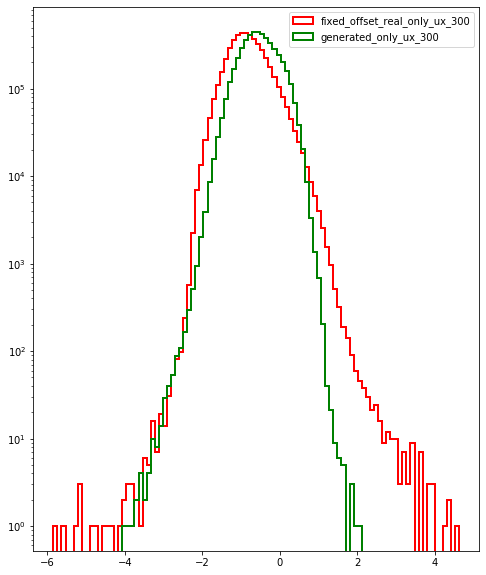

In [12]:

plt.hist([omega_generated_data[-300:].flatten(), cropped_normalized_omega_data[-300:].flatten()  ], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["generated_only_ux_300",  "fixed_offset_real_only_ux_300"])
plt.yscale("log")
plt.legend(loc='best')
# plt.savefig("PDE_new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_300_samples.png", dpi=200)


# Now doing L2 image plots on UX alone 


300it [00:02, 105.04it/s]
300it [00:04, 73.88it/s] 


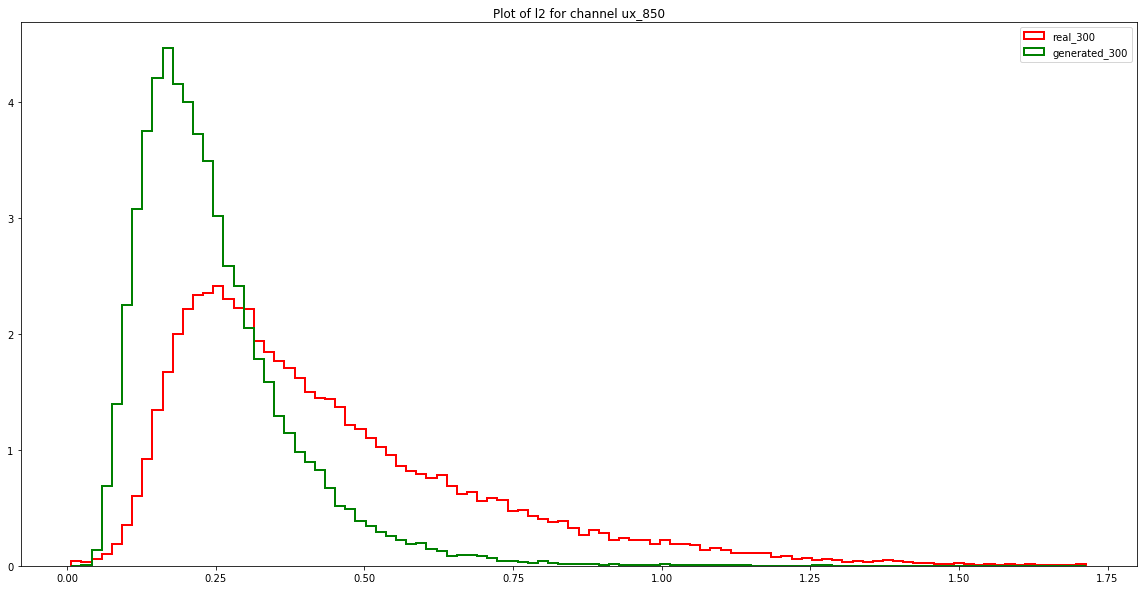

In [13]:
# Now l2 image plots





generated_image = omega_generated_data
real_image = cropped_normalized_omega_data[:300]

channels = 1
number_l2 = 300

fig, axs = plt.subplots(nrows=channels, figsize=(20, channels*10))
# for i, y_ax in enumerate(ys):
#     pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = ["ux_850"]
channels =1

for chan in range(channels):
    
#     generated_image =  generated_three_channel_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



    l2_real = []
    for i, img in tqdm(enumerate(real_image)):
        foo = [calculateDistance(img,j) for j in real_image[i+1:]]
        l2_real.append(foo)
    real_distances = [j for i in l2_real for j in i]

    axs.hist([  fake_distances, real_distances ], color=[ 'g', 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "generated_{}".format(number_l2), "real_{}".format(number_l2)  ], density=True)
    axs.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    axs.legend(loc='best')

# Results on unnormalized only UX at 128 with feature matching and logan fixed offset 192

In [2]:








counter = 75000


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/wo_normalized_ux_logan_annealed_feature_matching_fixed_offset_192_res_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)



files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
np.save(save_path + "wo_normalized_ux_logan_annealed_feature_matching_fixed_offset_192_res_128_counter_{}.npy".format(counter), final_array)





climate_counter = 75000

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path +   "wo_normalized_ux_logan_annealed_feature_matching_fixed_offset_192_res_128_counter_{}.npy".format(climate_counter))    
    
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)



normalized_omega_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/climate_data_original_ux_channel/1998.npy")
np.random.shuffle(normalized_omega_data)
print(normalized_omega_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data = []
for i in range (normalized_omega_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_omega_data.append(normalized_omega_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_omega_data[0].shape)
cropped_normalized_omega_data  = cropped_normalized_omega_data[0]
print(type(cropped_normalized_omega_data))


Number of files : 6
total_number_of_files: 6 and shape of each file (50, 128, 128, 1)
(300, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)
<class 'numpy.ndarray'>


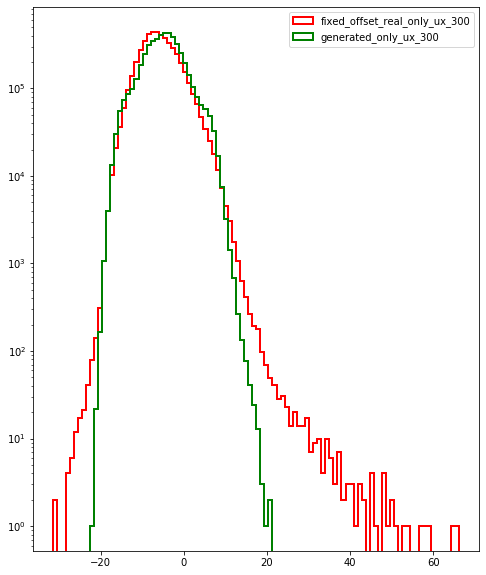

In [3]:

plt.hist([omega_generated_data[-300:].flatten(), cropped_normalized_omega_data[-300:].flatten()  ], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["generated_only_ux_300",  "fixed_offset_real_only_ux_300"])
plt.yscale("log")
plt.legend(loc='best')
# plt.savefig("PDE_new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_300_samples.png", dpi=200)

In [15]:








counter = 87500


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/new_dataset_feature_matching_wo_logan_annealed_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)



files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
np.save(save_path + "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(counter), final_array)






climate_counter = 87500

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path +   "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(climate_counter))    
    
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)



normalized_omega_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/climate_data_original/1998.npy")
np.random.shuffle(normalized_omega_data)
print(normalized_omega_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data = []
for i in range (normalized_omega_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_omega_data.append(normalized_omega_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_omega_data[0].shape)
cropped_normalized_omega_data  = cropped_normalized_omega_data[0]
print(type(cropped_normalized_omega_data))


Number of files : 17
total_number_of_files: 17 and shape of each file (50, 128, 128, 1)
(850, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)
<class 'numpy.ndarray'>


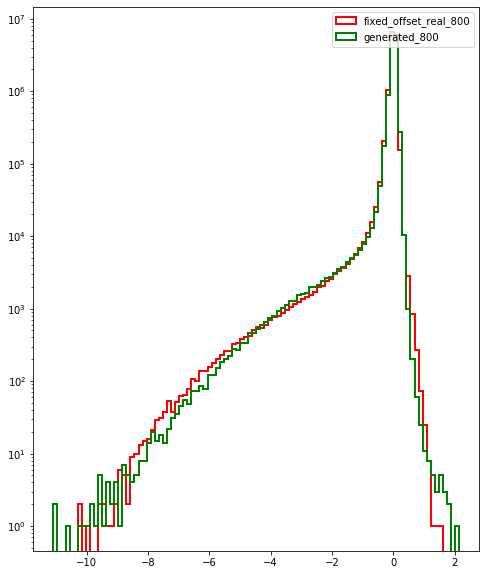

In [20]:

plt.hist([omega_generated_data[-800:].flatten(), cropped_normalized_omega_data[-800:].flatten()  ], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["generated_800",  "fixed_offset_real_800"])
plt.yscale("log")
plt.legend(loc='best')
# plt.savefig("PDE_new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_300_samples.png", dpi=200)

850it [00:20, 40.96it/s] 
850it [00:28, 30.25it/s] 


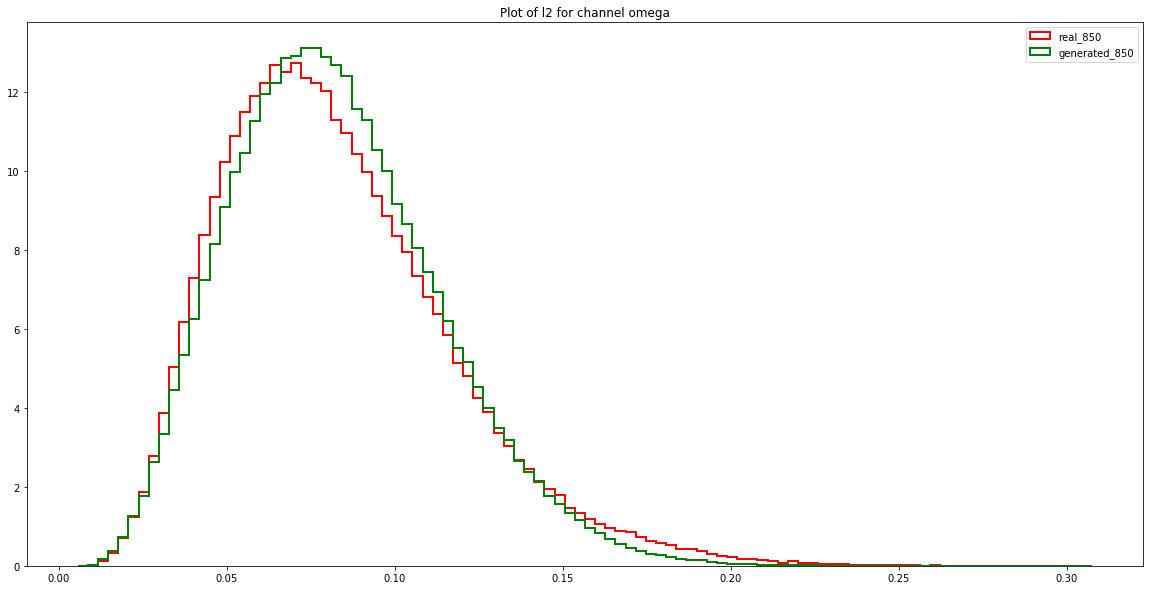

In [19]:
# Now l2 image plots





generated_image = omega_generated_data


channels = 1
number_l2 = 850

real_image = cropped_normalized_omega_data[:number_l2]

fig, axs = plt.subplots(nrows=channels, figsize=(20, channels*10))
# for i, y_ax in enumerate(ys):
#     pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = ["omega"]
channels =1

for chan in range(channels):
    
#     generated_image =  generated_three_channel_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



    l2_real = []
    for i, img in tqdm(enumerate(real_image)):
        foo = [calculateDistance(img,j) for j in real_image[i+1:]]
        l2_real.append(foo)
    real_distances = [j for i in l2_real for j in i]

    axs.hist([  fake_distances, real_distances ], color=[ 'g', 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "generated_{}".format(number_l2), "real_{}".format(number_l2)  ], density=True)
    axs.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    axs.legend(loc='best')

# Now doing abalation study with only logan i.e. Feature matching loss is turned off

In [12]:








counter = 90000


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/new_dataset_logan_annealed_wo_feature_matching_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)



files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
np.save(save_path + "new_dataset_logan_annealed_wo_feature_matching_128_300_counter_{}.npy".format(counter), final_array)






climate_counter = 90000

load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

omega_generated_data = np.load (load_path +   "new_dataset_logan_annealed_wo_feature_matching_128_300_counter_{}.npy".format(climate_counter))    
    
np.random.shuffle(omega_generated_data)
print(omega_generated_data.shape)



normalized_omega_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/climate_data_original/1998.npy")
np.random.shuffle(normalized_omega_data)
print(normalized_omega_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_omega_data = []
for i in range (normalized_omega_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_omega_data.append(normalized_omega_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_omega_data[0].shape)
cropped_normalized_omega_data  = cropped_normalized_omega_data[0]
print(type(cropped_normalized_omega_data))


Number of files : 6
total_number_of_files: 6 and shape of each file (50, 128, 128, 1)
(300, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)
<class 'numpy.ndarray'>


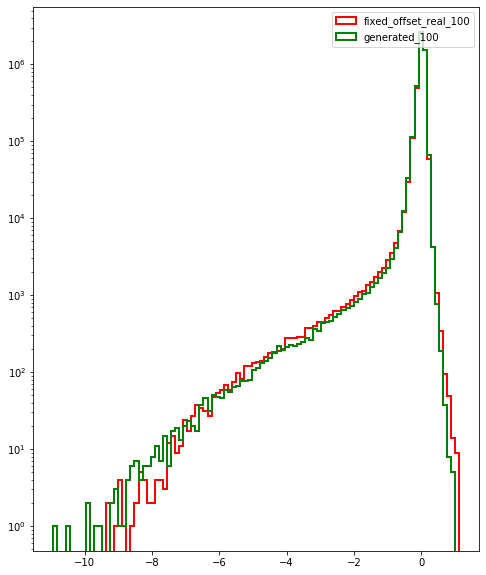

In [13]:

plt.hist([omega_generated_data[-300:].flatten(), cropped_normalized_omega_data[-300:].flatten()  ], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["generated_100",  "fixed_offset_real_100"])
plt.yscale("log")
plt.legend(loc='best')
# plt.savefig("PDE_new_dataset_logan_annealed_feature_matching_fixed_offset_192_only_ux_normalized_128_300_samples.png", dpi=200)

300it [00:02, 104.50it/s]
300it [00:03, 85.60it/s] 


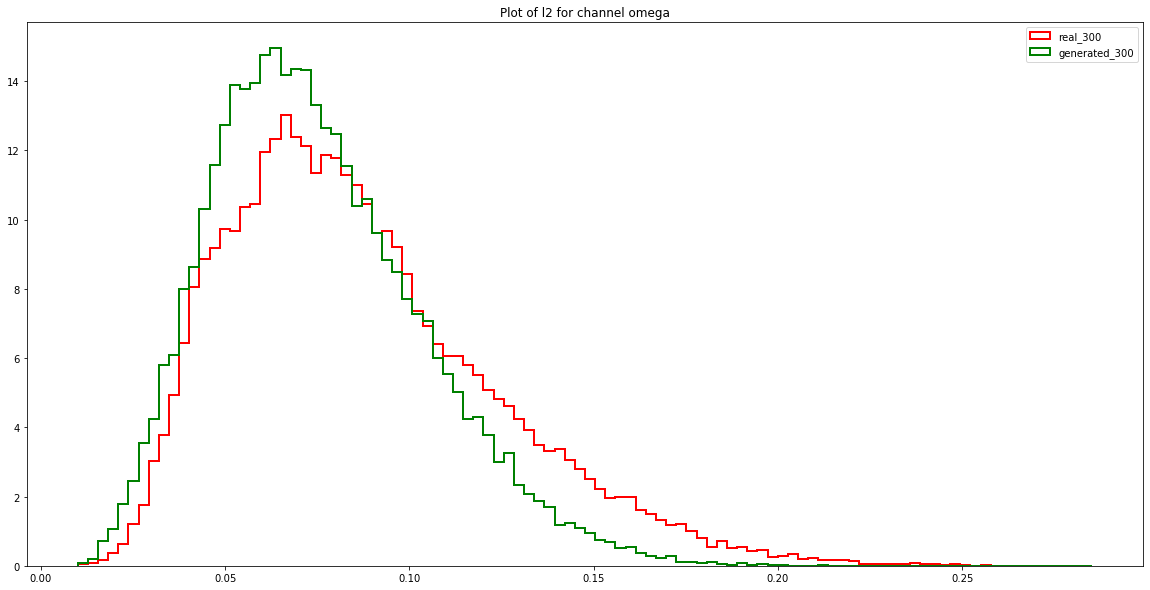

In [14]:
# Now l2 image plots





generated_image = omega_generated_data
real_image = cropped_normalized_omega_data[:300]

channels = 1
number_l2 = 300

fig, axs = plt.subplots(nrows=channels, figsize=(20, channels*10))
# for i, y_ax in enumerate(ys):
#     pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = ["omega"]
channels =1

for chan in range(channels):
    
#     generated_image =  generated_three_channel_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



    l2_real = []
    for i, img in tqdm(enumerate(real_image)):
        foo = [calculateDistance(img,j) for j in real_image[i+1:]]
        l2_real.append(foo)
    real_distances = [j for i in l2_real for j in i]

    axs.hist([  fake_distances, real_distances ], color=[ 'g', 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "generated_{}".format(number_l2), "real_{}".format(number_l2)  ], density=True)
    axs.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    axs.legend(loc='best')

In [ ]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


prec_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/only_precipitation_unnormalized/1998.npy"
# prec_path = "/project/projectdirs/dasrepo/mustafa/data/climate/sims/unnormalized/seven_channels_1998.npy"

# /project/projectdirs/dasrepo/mustafa/data/climate/sims/unnormalized/seven_channels_{}.npy

prec_data = np.load(prec_path, mmap_mode='r')[:500]
# prec_data = prec_data[~is_outlier(prec_data)]


In [2]:


prec_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/only_precipitation_unnormalized/1998.npy"
# prec_path = "/project/projectdirs/dasrepo/mustafa/data/climate/sims/unnormalized/seven_channels_1998.npy"

# /project/projectdirs/dasrepo/mustafa/data/climate/sims/unnormalized/seven_channels_{}.npy

prec_data = np.load(prec_path, mmap_mode='r')[:1000]
# prec_data = prec_data[~is_outlier(prec_data)]

In [3]:
print(prec_data.shape)

(1000, 1, 512, 512)


In [15]:
a = 0.008
norm_prec_data = prec_data/ (prec_data+ a)


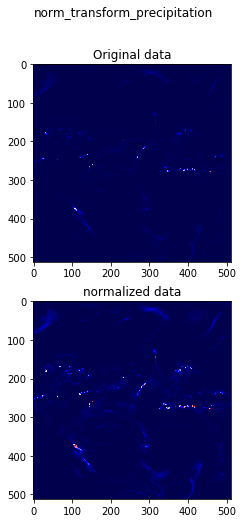

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))
fig.suptitle('norm_transform_precipitation')
ax1.imshow(prec_data[4,0], cmap='seismic');
ax1.title.set_text("Original data")
ax2.imshow(norm_prec_data[4,0], cmap='seismic');
ax2.title.set_text("normalized data")

# plt.savefig("./normalized_transformation_with_constant_{}.png".format(a), dpi=200)

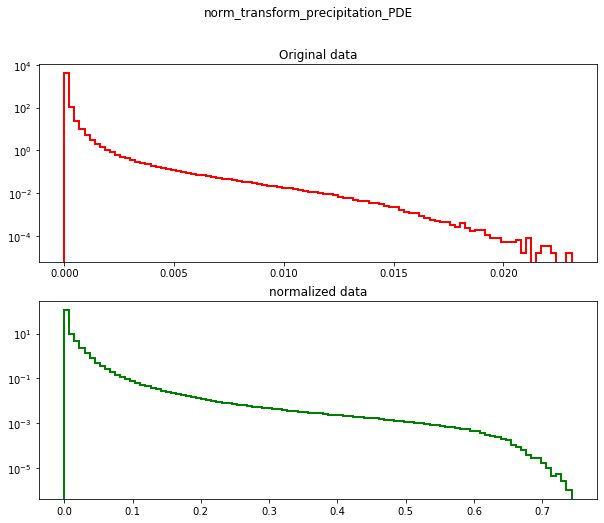

In [17]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))
fig.suptitle('norm_transform_precipitation_PDE')
ax1.hist([prec_data.flatten()], color=[ 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "{}".format("original_precipitation_PDE") ], density=True)
ax1.title.set_text("Original data")
ax1.set_yscale("log")
ax2.hist([ norm_prec_data.flatten()], color=[ 'g'], bins=100, linewidth=2 ,histtype='step', label=[ "{}_{}".format("normalized_precipitation_PDE", a) ], density=True)
ax2.title.set_text("normalized data")
ax2.set_yscale("log")


# plt.savefig("./normalized_transformation_PDE_with_constant_{}.png".format(a), dpi=200)

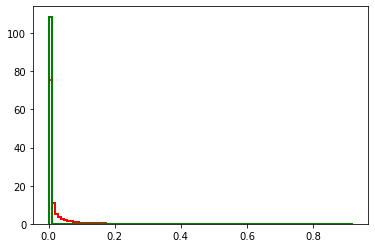

In [14]:
# norm_prec_data = prec_data/ (prec_data+ 0.002)
# _ =  plt.hist([prec_data.flatten(), norm_prec_data.flatten()], color=['g', 'r'], bins=100, linewidth=2 ,histtype='step', label=["{}".format("precipitation_unnormalized"), "{}".format("normalized_precipitation_0.002") ], density=True)


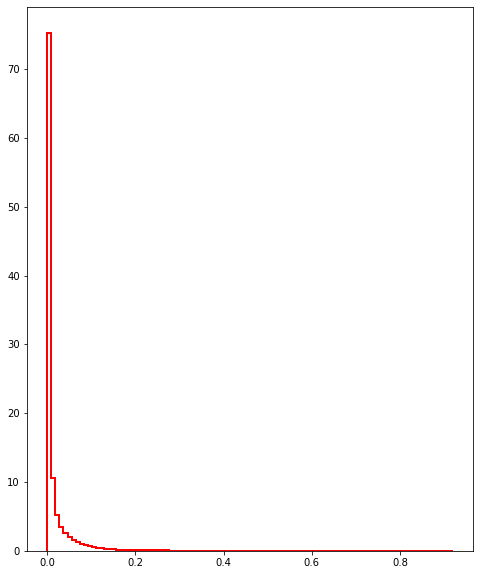

In [24]:
_ = plt.hist([ norm_prec_data.flatten()], color=[ 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "{}".format("normalized_precipitation_0.002") ], density=True)


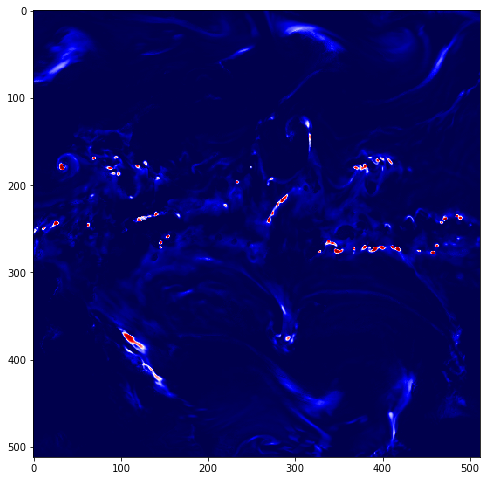

In [25]:
plt.imshow(norm_prec_data[4,0], cmap='seismic');

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.64642041e-03, 9.99535343e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

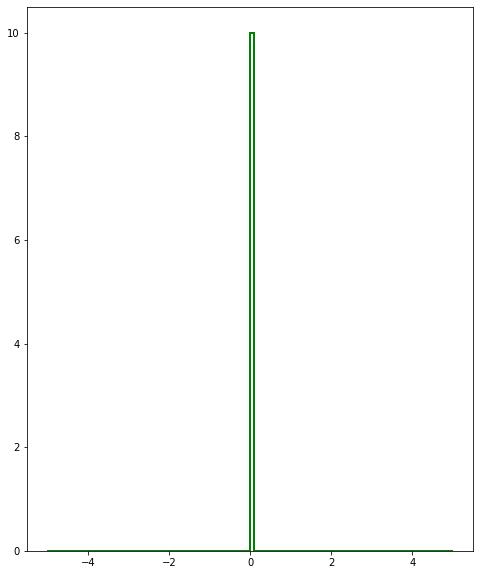

In [6]:
plt.hist([prec_data[1000:]], color=['g'], bins=100, range=[-5,5], linewidth=2 ,histtype='step', label="{}".format("precipitation_unnormalized"), density=True)
# plt.xlim(xmin=-1.0, xmax = 0.0)
# plt.yscale("log")

In [7]:
del(prec_data)

In [11]:

temp_load_file_path =  "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/precipitation_normalized_training_with_logan_feature_matching_fixed_offset_192_resolution_128/result/detecting_size_of_generated_images/"

gfi  = np.load( temp_load_file_path + "generated_fake_images.npy", mmap_mode = 'r+' )

ri  = np.load( temp_load_file_path + "real_images.npy", mmap_mode = 'r+' )



In [14]:
print(gfi.shape)

(16, 1, 128, 128)


In [13]:
print(ri.shape)

(100, 1, 128, 128)


In [10]:








counter = 87500


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/precipitation_normalized_training_with_logan_feature_matching_fixed_offset_192_resolution_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)



files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
# np.save(save_path + "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(counter), final_array)






# climate_counter = 87500

# load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

# omega_generated_data = np.load (load_path +   "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(climate_counter))    
 
prec_generated_data = final_array
np.random.shuffle(prec_generated_data)
print(prec_generated_data.shape)



normalized_prec_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/only_precipitation_normalized_0.008_x/1998.npy")
np.random.shuffle(normalized_prec_data)
print(normalized_prec_data.shape)



climate_img_size = 512
crop_size = 128
cropped_normalized_prec_data = []
for i in range (normalized_prec_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_normalized_prec_data.append(normalized_prec_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_normalized_prec_data[0].shape)
cropped_normalized_prec_data  = cropped_normalized_prec_data[0]

    

Number of files : 10
total_number_of_files: 10 and shape of each file (50, 128, 128, 1)
(500, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)


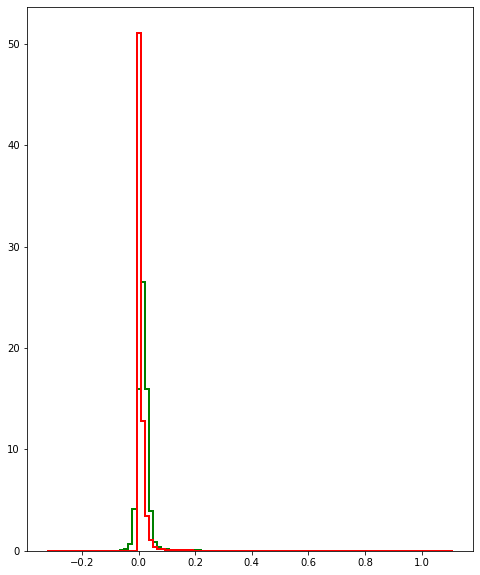

In [20]:
_ = plt.hist([ cropped_normalized_prec_data[-500:].flatten(), prec_generated_data.flatten() ], color=[ 'r', 'g'], bins=100, linewidth=2 ,histtype='step', label=[ "{}".format("normalized_precipitation_0.008"), "{}".format("generated_precipitation_0.008") ], density=True)


In [16]:
from scipy import fftpack


def pixhist(imgs, vals, inverse_transf=None):
    if inverse_transf:
        imgs = inverse_transf(imgs)
    val_hist, val_bin_edges = np.histogram(vals, bins=50 )
    gen_hist, gen_bin_edges  = np.histogram(imgs, bins=50)
    print(np.sum(val_hist))
    print(np.sum(gen_hist))
    
    val_centers = (val_bin_edges[:-1] + val_bin_edges[1:]) / 2
    
    gen_centers = (gen_bin_edges[:-1] + gen_bin_edges[1:]) / 2
    
    fig = plt.figure(figsize = (8,10), dpi=200)
    plt.errorbar(val_centers, val_hist, yerr=np.sqrt(val_hist), fmt='ks--', label='real')
    plt.errorbar(gen_centers, gen_hist, yerr=np.sqrt(gen_hist), fmt='ro', label='generated')
    plt.xlabel('Value')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    sqdiff = np.power(val_hist - gen_hist, 2.0)
    val_hist[val_hist<=0.] = 1.
#     plt.savefig("./normalized_prec_data_0.008_at_generator_87500.jpeg", dpi=200)
    return fig, np.sum(np.divide(sqdiff, val_hist))


def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged power spectrum (1D), for a batch of images.
    image - The image tensor, [N,C,H,W] format
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fractional pixels).
    
    """
    batch, channel, height, width = image.shape
    # Calculate the indices from the image
    y, x = np.indices([height, width])
    
    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])
    ind = np.argsort(r.flat)

    # Get sorted radii
    r_sorted = r.flat[ind]
    i_sorted = np.reshape(image, (batch, channel, -1,))[:,:,ind]
    
    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(np.int32)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin

    # Cumulative sum to figure out sums for each radius bin
    
    csum = np.cumsum(i_sorted, axis=-1)
    tbin = csum[:,:,rind[1:]] - csum[:,:,rind[:-1]]
    radial_prof = tbin / nr

    return radial_prof


def power_spectrum(image):
    """Computes azimuthal average of 2D power spectrum of a np array image batch.
       For plotting power spectra of images against validation set."""
    GLOBAL_MEAN = 1. 
    F1 = fftpack.fftn((image - GLOBAL_MEAN)/GLOBAL_MEAN, axes=[2,3])
    F2 = fftpack.fftshift(F1, axes=[2,3])
    pspec2d = np.abs(F2)**2
    P_k = np.squeeze(azimuthalAverage(pspec2d))
    k = np.arange(P_k.shape[1])
    return k, P_k


def pspect(imgs, vals, inverse_transf=None):
    if inverse_transf:
        imgs = inverse_transf(imgs)
    k, Pk_val = power_spectrum(vals)
    k, Pk_gen = power_spectrum(imgs)
    val_mean = np.mean(Pk_val, axis=0)
    gen_mean = np.mean(Pk_gen, axis=0)
    val_std = np.std(Pk_val, axis=0)
    gen_std = np.std(Pk_gen, axis=0)


    fig = plt.figure(figsize = (8,10), dpi=200)
    # print(" \n ********************  inside  pspect gen_mean.shape {} and gen-std.shape {} *****************\n\n ".format(gen_mean.shape, gen_std.shape ))
    plt.fill_between(k, (gen_mean - gen_std).squeeze(), (gen_mean + gen_std).squeeze(), color='red', alpha=0.4)
    plt.plot(k, val_mean, 'k:')
    plt.plot(k, gen_mean, 'r--')
    plt.plot(k, val_mean + val_std, 'k-')
    plt.plot(k, val_mean - val_std, 'k-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$P(k)$')
    plt.xlabel(r'$k$')
    plt.title('Power Spectrum')
    return fig, np.sum(np.divide(np.power(gen_mean[:64] - val_mean[:64], 2.0), val_mean[:64]))

16384
16384


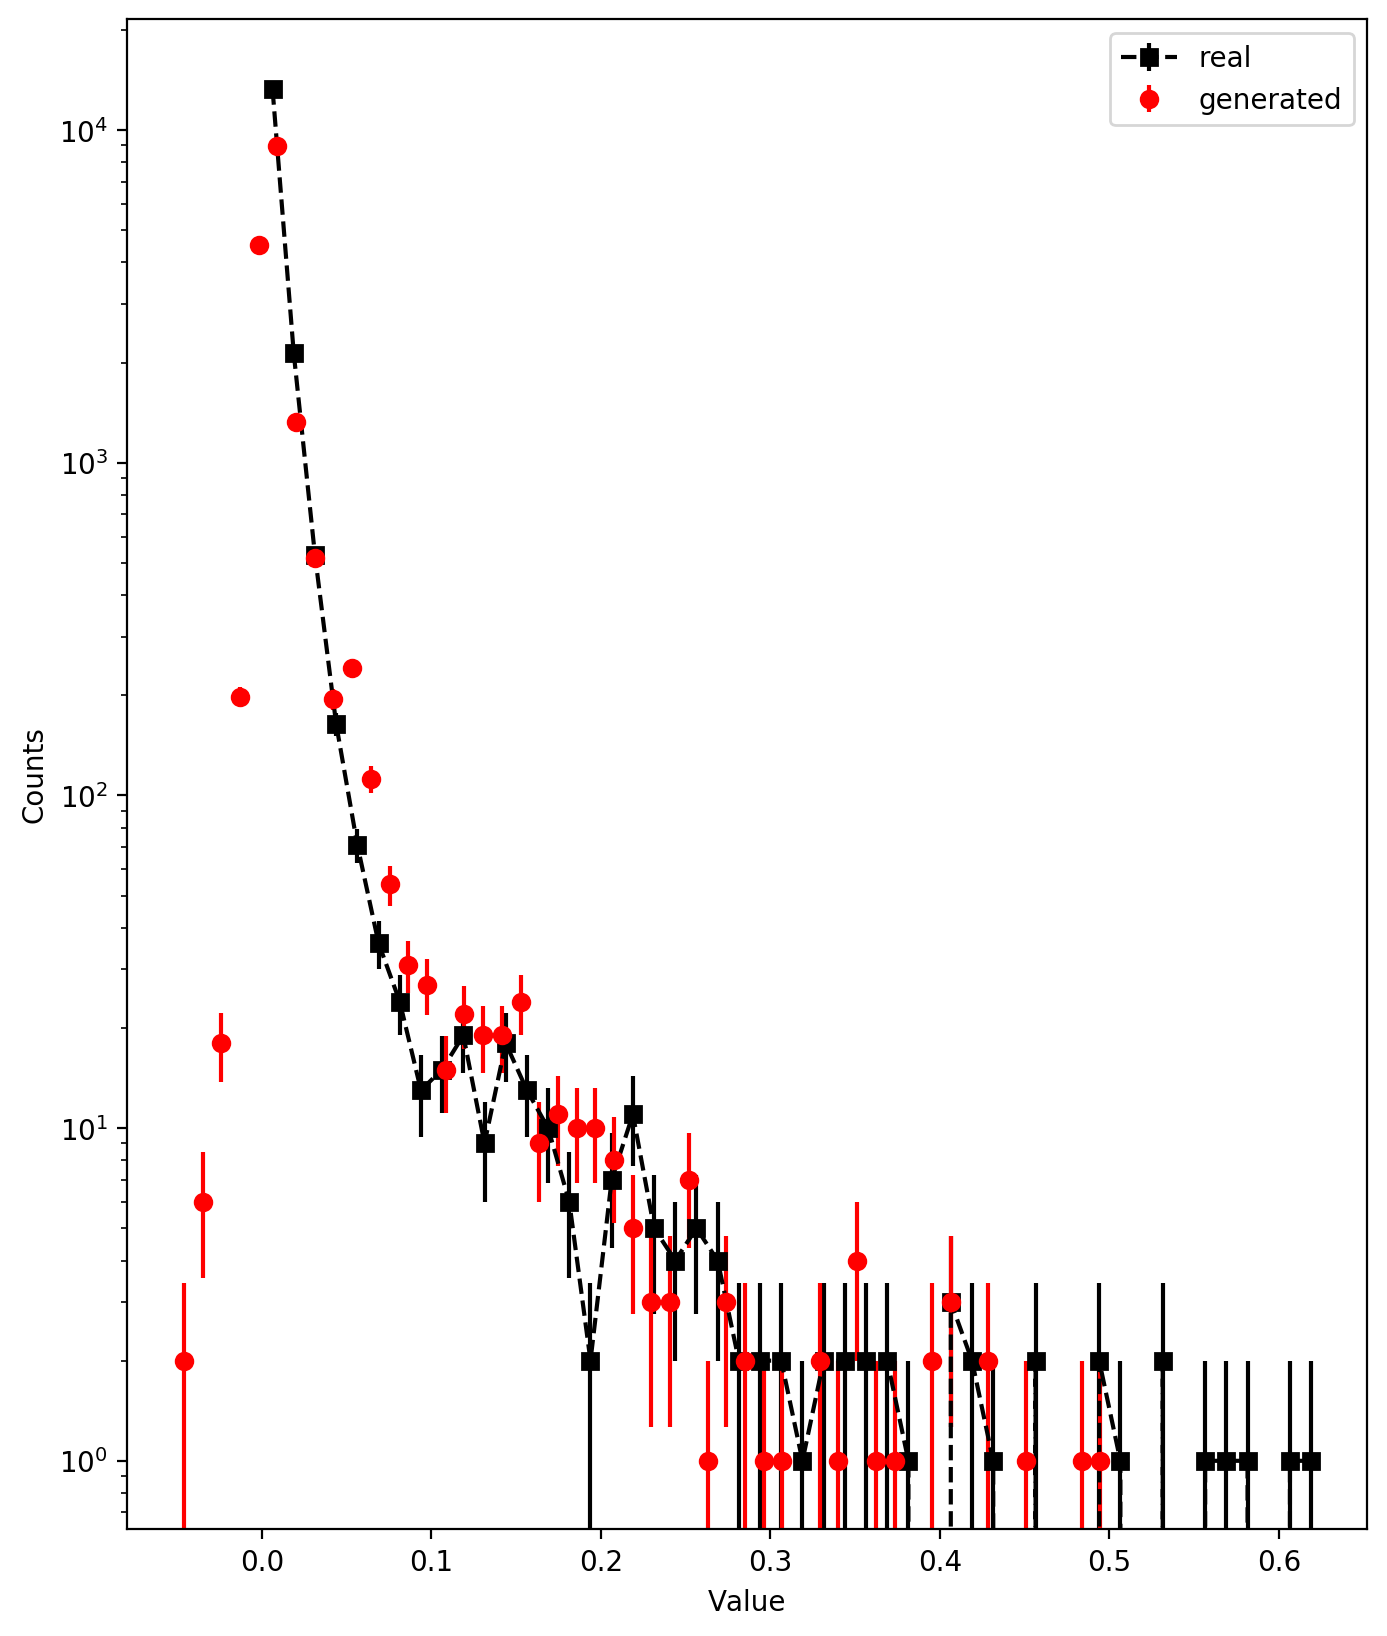

In [17]:
# power_spectra_image, spectra_vals = pspect(prec_generated_data, cropped_normalized_prec_data[-500:])
pixhistogram_image, pix_vals = pixhist(prec_generated_data[-100:], cropped_normalized_prec_data[-100:])

100it [00:00, 329.43it/s]
100it [00:00, 260.59it/s]


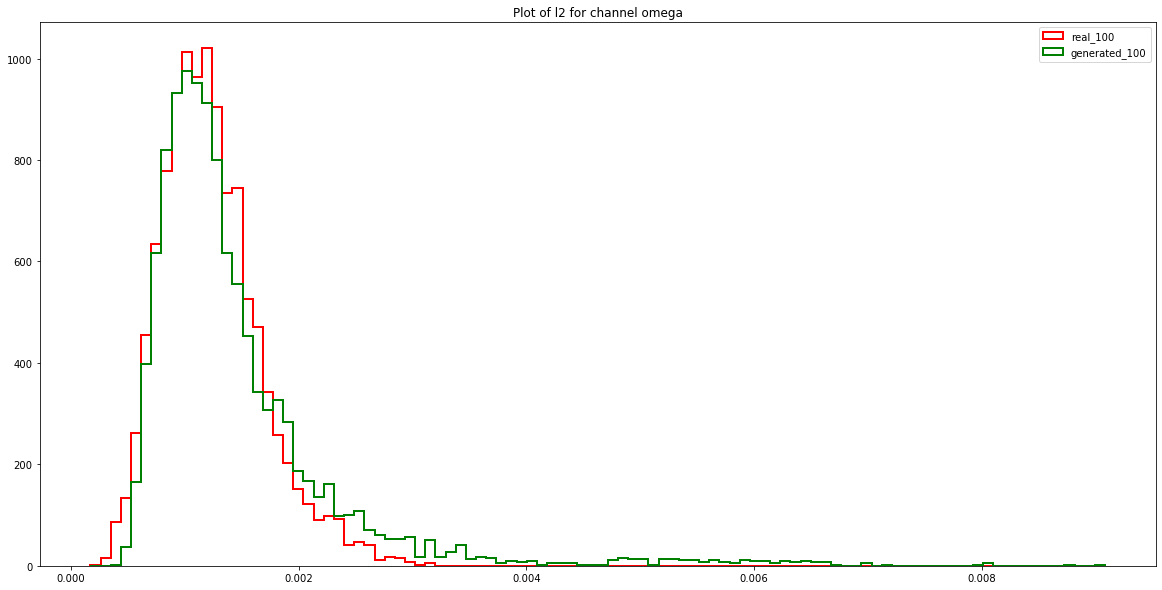

In [6]:
# Now l2 image plots





generated_image = prec_generated_data[:number_l2]


channels = 1
number_l2 = 100

real_image = cropped_normalized_prec_data[:number_l2]

fig, axs = plt.subplots(nrows=channels, figsize=(20, channels*10))
# for i, y_ax in enumerate(ys):
#     pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])

def calculateDistance(i1, i2):
    return np.mean((i1-i2)**2)

channel_names = ["omega"]
channels =1

for chan in range(channels):
    
#     generated_image =  generated_three_channel_data[:number_l2, :, :, chan]
#     real_image = normalized_original_data[:number_l2, chan,]
    l2_generated = []
    for i, img in tqdm(enumerate(generated_image)):
        foo = [calculateDistance(img,j) for j in generated_image[i+1:]]
        l2_generated.append(foo)

    fake_distances = [j for i in l2_generated for j in i]



    l2_real = []
    for i, img in tqdm(enumerate(real_image)):
        foo = [calculateDistance(img,j) for j in real_image[i+1:]]
        l2_real.append(foo)
    real_distances = [j for i in l2_real for j in i]

    axs.hist([  fake_distances, real_distances ], color=[ 'g', 'r'], bins=100, linewidth=2 ,histtype='step', label=[ "generated_{}".format(number_l2), "real_{}".format(number_l2)  ], density=True)
    axs.set_title('Plot of l2 for channel {}'.format(channel_names[chan]))
    # plt.yscale("log")
    # plt.gca().invert_yaxis()
    axs.legend(loc='best')

In [13]:













counter = 125000


path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/prw_with_logan_feature_matching_fixed_offset_192_resolution_128/result/single_generator_results/generator_{}_images_50_file_*.npy".format(counter)
# "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/precipitation_normalized_training_with_logan_feature_matching_fixed_offset_192_resolution_128




files = sorted(glob(path))

print("Number of files : {}".format(len(files)))

list_of_generated_images = []

for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    list_of_generated_images.append(generated_images)
    

    
print("total_number_of_files: {} and shape of each file {}".format(len(list_of_generated_images) ,  list_of_generated_images[0].shape))
    
    
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    
    
final_array = np.concatenate(list_of_generated_images, axis=0 )
# np.save(save_path + "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(counter), final_array)






# climate_counter = 87500

# load_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/test_samples/"

# omega_generated_data = np.load (load_path +   "new_dataset_feature_matching_wo_logan_annealed_128_counter_{}_mustafa.npy".format(climate_counter))    
 
prw_generated_data = final_array
np.random.shuffle(prw_generated_data)
print(prw_generated_data.shape)



prw_original_data = np.load ( "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/dataset/only_prw/1998.npy")
np.random.shuffle(prw_original_data)
print(prw_original_data.shape)



climate_img_size = 512
crop_size = 128
cropped_prw_original_data = []
for i in range (prw_original_data.shape[0]):       
    # offset_width = randint(0, climate_img_size - crop_size-1)
    offset_width = 192
    cropped_prw_original_data.append(prw_original_data[:, -1:, offset_width : offset_width + crop_size , (climate_img_size - crop_size)//2 : (climate_img_size - crop_size)//2 + crop_size])


print(cropped_prw_original_data[0].shape)
cropped_prw_original_data  = cropped_prw_original_data[0]

    

Number of files : 5
total_number_of_files: 5 and shape of each file (50, 128, 128, 1)
(250, 128, 128, 1)
(2920, 1, 512, 512)
(2920, 1, 128, 128)


In [14]:
from scipy import fftpack


def pixhist(imgs, vals, inverse_transf=None):
    if inverse_transf:
        imgs = inverse_transf(imgs)
    val_hist, val_bin_edges = np.histogram(vals, bins=50 )
    gen_hist, gen_bin_edges  = np.histogram(imgs, bins=50)
    print(np.sum(val_hist))
    print(np.sum(gen_hist))
    
    val_centers = (val_bin_edges[:-1] + val_bin_edges[1:]) / 2
    
    gen_centers = (gen_bin_edges[:-1] + gen_bin_edges[1:]) / 2
    
    fig = plt.figure(figsize = (8,10), dpi=200)
    plt.errorbar(val_centers, val_hist, yerr=np.sqrt(val_hist), fmt='ks--', label='real')
    plt.errorbar(gen_centers, gen_hist, yerr=np.sqrt(gen_hist), fmt='ro', label='generated')
    plt.xlabel('Value')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    sqdiff = np.power(val_hist - gen_hist, 2.0)
    val_hist[val_hist<=0.] = 1.
#     plt.savefig("./normalized_prec_data_0.008_at_generator_87500.jpeg", dpi=200)
    return fig, np.sum(np.divide(sqdiff, val_hist))


def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged power spectrum (1D), for a batch of images.
    image - The image tensor, [N,C,H,W] format
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fractional pixels).
    
    """
    batch, channel, height, width = image.shape
    # Calculate the indices from the image
    y, x = np.indices([height, width])
    
    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])
    ind = np.argsort(r.flat)

    # Get sorted radii
    r_sorted = r.flat[ind]
    i_sorted = np.reshape(image, (batch, channel, -1,))[:,:,ind]
    
    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(np.int32)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin

    # Cumulative sum to figure out sums for each radius bin
    
    csum = np.cumsum(i_sorted, axis=-1)
    tbin = csum[:,:,rind[1:]] - csum[:,:,rind[:-1]]
    radial_prof = tbin / nr

    return radial_prof


def power_spectrum(image):
    """Computes azimuthal average of 2D power spectrum of a np array image batch.
       For plotting power spectra of images against validation set."""
    GLOBAL_MEAN = 1. 
    F1 = fftpack.fftn((image - GLOBAL_MEAN)/GLOBAL_MEAN, axes=[2,3])
    F2 = fftpack.fftshift(F1, axes=[2,3])
    pspec2d = np.abs(F2)**2
    P_k = np.squeeze(azimuthalAverage(pspec2d))
    k = np.arange(P_k.shape[1])
    return k, P_k


def pspect(imgs, vals, inverse_transf=None):
    if inverse_transf:
        imgs = inverse_transf(imgs)
    k, Pk_val = power_spectrum(vals)
    k, Pk_gen = power_spectrum(imgs)
    val_mean = np.mean(Pk_val, axis=0)
    gen_mean = np.mean(Pk_gen, axis=0)
    val_std = np.std(Pk_val, axis=0)
    gen_std = np.std(Pk_gen, axis=0)


    fig = plt.figure(figsize = (8,10), dpi=200)
    # print(" \n ********************  inside  pspect gen_mean.shape {} and gen-std.shape {} *****************\n\n ".format(gen_mean.shape, gen_std.shape ))
    plt.fill_between(k, (gen_mean - gen_std).squeeze(), (gen_mean + gen_std).squeeze(), color='red', alpha=0.4)
    plt.plot(k, val_mean, 'k:')
    plt.plot(k, gen_mean, 'r--')
    plt.plot(k, val_mean + val_std, 'k-')
    plt.plot(k, val_mean - val_std, 'k-')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$P(k)$')
    plt.xlabel(r'$k$')
    plt.title('Power Spectrum')
    return fig, np.sum(np.divide(np.power(gen_mean[:64] - val_mean[:64], 2.0), val_mean[:64]))

4096000
4096000


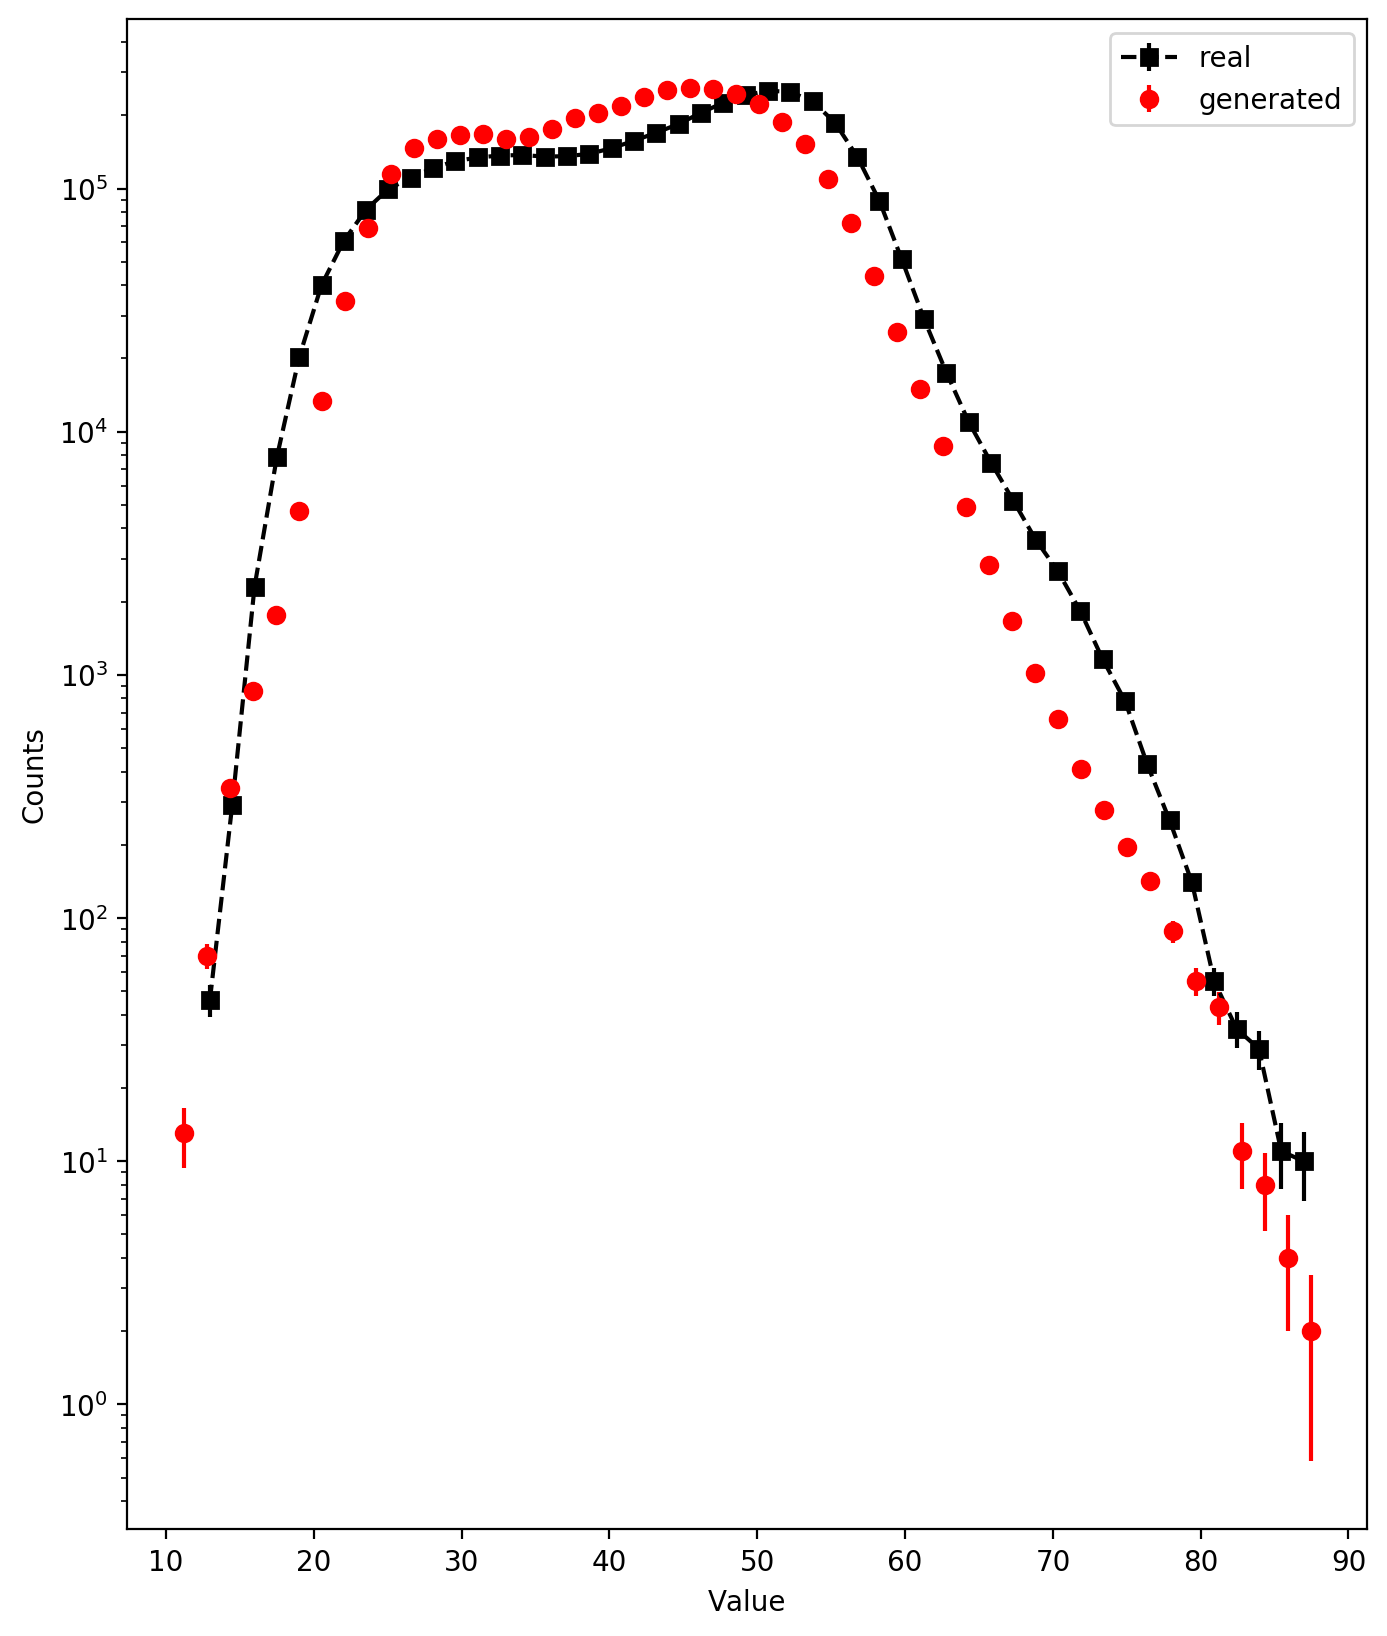

In [15]:
# power_spectra_image, spectra_vals = pspect(prec_generated_data, cropped_normalized_prec_data[-500:])
pixhistogram_image, pix_vals = pixhist(prw_generated_data[-250:], cropped_prw_original_data[-250:])

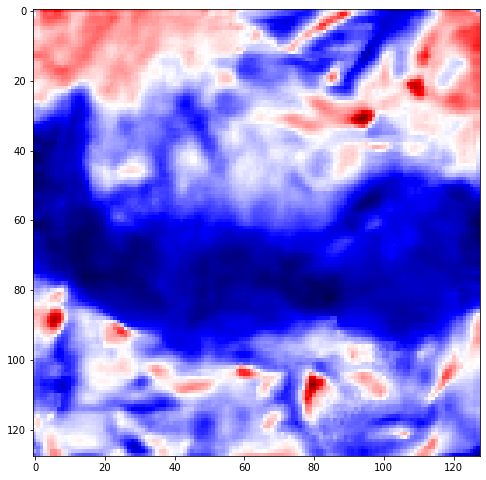

In [22]:
plt.imshow(prw_generated_data[10,:,:,0], cmap='seismic' );
# vmin= -1.0, vmax = 1.0

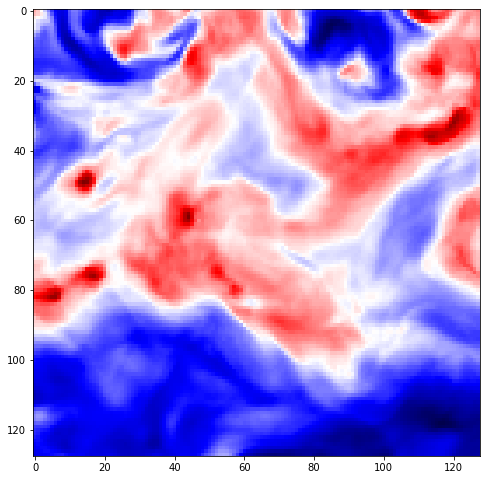

In [20]:
plt.imshow(cropped_prw_original_data[5,0,:,:], cmap='seismic' );
# vmin= -1.0, vmax = 1.0

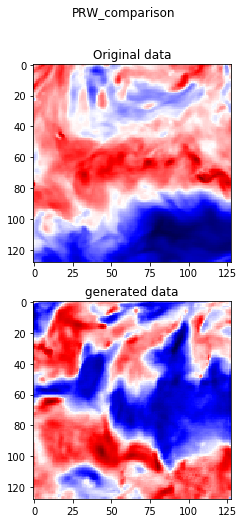

In [25]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))
fig.suptitle('PRW_comparison')
ax1.imshow(cropped_prw_original_data[100,0,:,:], cmap='seismic' );
ax1.title.set_text("Original data")
# ax1.set_yscale("log")
ax2.imshow(prw_generated_data[100,:,:,0], cmap='seismic' );
# hist([ norm_prec_data.flatten()], color=[ 'g'], bins=100, linewidth=2 ,histtype='step', label=[ "{}_{}".format("normalized_precipitation_PDE", a) ], density=True)
ax2.title.set_text("generated data")
# ax2.set_yscale("log")


plt.savefig("./prw_comparison_generator_{}.png".format(counter), dpi=200)